In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()

In [10]:
df['Genre'] = label_encoder.fit_transform(df['Genre'])

In [12]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [13]:
from sklearn.cluster import KMeans

In [35]:
x = df.iloc[:,[2,3]].values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

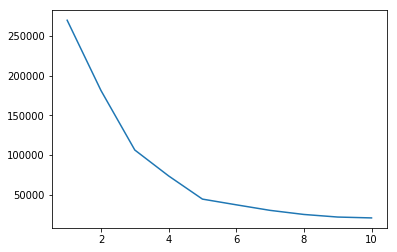

In [36]:
plt.plot(range(1,11),wcss)

In [37]:
kmeans = KMeans(n_clusters=5, init='k-means++',max_iter=300,n_init=10,random_state=0)

In [38]:
y_kmeans = kmeans.fit_predict(x)

In [39]:
type(y_kmeans)

numpy.ndarray

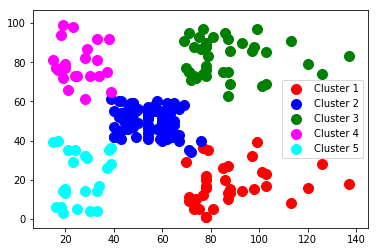

In [45]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='magenta',label='Cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='cyan',label='Cluster 5')
plt.legend()